In [1]:
import numpy as np # 텐서 연산
import pandas as pd # 표 형식
import matplotlib.pyplot as plt # 그래프

In [2]:
class 완전연결:
    def __init__(self, 입력수, 출력수, 활성화=None):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.activation = 활성화

    def __call__(self, Xs):
        zs = np.dot(Xs, self.W) + self.b
        if self.activation:
            return self.activation(zs)
        return zs # 항등 함수

class 신경망:
    def __init__(self):
        self.layers = []

    def add(self, 계층):
        self.layers.append(계층)

    def __call__(self, Xs):
        """순전파 (feed forward)"""
        출력 = Xs
        for 계층 in self.layers:
            출력 = 계층(출력)
        return 출력

FC = Dense = Affine = Linear = 완전연결

In [3]:
import pickle

In [4]:
with open('data/mnist/mnist_ndarray.pkl', 'rb') as 파일:
    mnist_data = pickle.load(파일)

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist_data
print(train_images.shape, test_images.shape)
assert train_images.shape[1:] == test_images.shape[1:]
assert len(train_images) == len(train_labels)
assert len(test_images) == len(test_labels)

(60000, 28, 28) (10000, 28, 28)


In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_images[0].min(), train_images[0].max()

(0, 255)

In [8]:
np.exp(1000.0)

C:\Users\student\AppData\Local\Temp\ipykernel_6596\1233423015.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000.0)


inf

In [9]:
def 전처리(images):
    Xs = images.astype('float32')
    Xs = Xs.reshape(-1, 28 * 28)
    Xs /= 255
    return Xs

X_train = 전처리(train_images)
print(train_images.dtype, '->', X_train.dtype)
print(train_images.shape, '->', X_train.shape)
print(train_images.max(), '->', X_train.max())

uint8 -> float32
(60000, 28, 28) -> (60000, 784)
255 -> 1.0


In [10]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

model = 신경망()
model.add(FC(784, 50, sigmoid))
model.add(FC(50, 100, sigmoid))
model.add(FC(100, 10))

학습된 가중치를 신경망의 각 계층에 적용합니다.

In [11]:
import pickle

with open('data/mnist/mnist_weight.pkl', 'rb') as 파일:
    params = pickle.load(파일)

for layer, (W, b) in zip(model.layers, params):
    assert layer.W.shape == W.shape
    assert layer.b.shape == b.shape
    layer.W = W
    layer.b = b

In [12]:
X_test = 전처리(test_images)
outputs = model(X_test)
print(f'X={X_test.shape} -> model -> y={outputs.shape}')
y_pred = outputs.argmax(axis=1)
채점 = y_pred == test_labels
print(f'분류 정확도: {np.mean(채점):.2%}')

X=(10000, 784) -> model -> y=(10000, 10)
분류 정확도: 93.52%


In [13]:
np.array([[0.7, 0.2, 0.1],
          [0.2, 0.7, 0.1],
          [0.2, 0.1, 0.7]]).argmax(axis=1)

array([0, 1, 2], dtype=int64)

# 신경망 학습

1. 손실 함수
2. 최적화

## 손실 함수

1. 회귀 출력 (평균제곱오차)
2. 분류 출력

Loss (y): 0.0
Loss (y0): 1.25
Loss (y_LR): 1.24
Loss (y1): 10.20


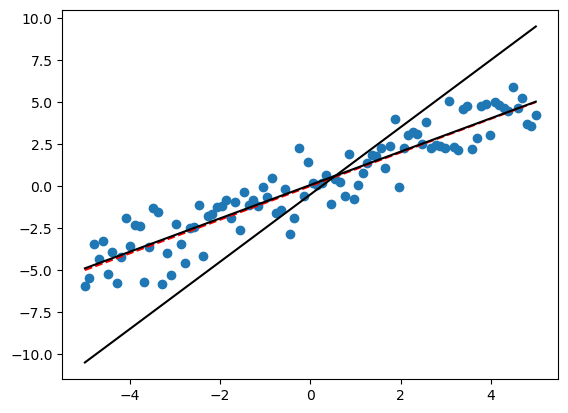

In [14]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

Xs = x.reshape(-1, 1)
model = LinearRegression().fit(Xs, y)

# 선형 모형
f = lambda x, w, b: w * x + b
# 평균제곱오차
평균제곱오차 = mse = lambda y, y_pred: np.mean((y - y_pred) ** 2)
y0 = y - noise
y1 = f(x, w=2.0, b=-0.5)
print(f'Loss (y): {mse(y, y)}')
print(f'Loss (y0): {mse(y, y0):.2f}')
print(f'Loss (y_LR): {mse(y, y_pred=model.predict(Xs)):.2f}')
print(f'Loss (y1): {mse(y, y1):.2f}')

plt.scatter(x, y)
plt.plot(x, y - noise, 'r--')
plt.plot(x, model.predict(Xs), 'k')
plt.plot(x, y1, 'k')
plt.show()

### 분류 출력 평가

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
np.unique(iris.target)

model = LogisticRegression(C=0.1).fit(iris.data, iris.target)
outputs = model.predict_proba(iris.data)
pd.DataFrame(outputs, columns=[f'Pr(y={i}|x)' for i in range(3)]).sample(5)

,Pr(y=0|x),Pr(y=1|x),Pr(y=2|x)
75,0.047848,0.619731,0.332421
11,0.898740,0.100445,0.000814
83,0.014600,0.468375,0.517025
118,0.000073,0.053986,0.945940
31,0.884248,0.114637,0.001114


In [16]:
유형수 = 3
원핫행렬 = np.eye(유형수)
원핫행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
outputs = np.array([0.7, 0.2, 0.1])
label = 0
y = 원핫행렬[label]
print(f'{label} -> OHE -> {y}')
오차 = y - outputs
print(f'error={오차}')

0 -> OHE -> [1. 0. 0.]
error=[ 0.3 -0.2 -0.1]


In [18]:
SSE = lambda y, y_pred: np.sum((y - y_pred) ** 2) * 0.5

y = np.array([1, 0, 0])
print(f'Loss={SSE(y, y_pred=np.array([0.3, 0.3, 0.4])):.2f}')
print(f'Loss={SSE(y, y_pred=np.array([0.7, 0.2, 0.1])):.2f}')
print(f'Loss={SSE(y, y_pred=np.array([1.0, 0.0, 0.0]))}')

Loss=0.37
Loss=0.07
Loss=0.0


In [19]:
H = 정보엔트로피산출 = lambda p: -np.sum(p * np.log2(p))

In [20]:
print(f'평균정보량: {H(p=np.array([0.5, 0.5]))} 새넌')
print(f'평균정보량: {H(p=np.array([0.25, 0.25, 0.25, 0.25]))} 새넌')

평균정보량: 1.0 새넌
평균정보량: 2.0 새넌
